In [102]:
import numpy as np

In [153]:
import pandas as pd

In [104]:
import matplotlib as plt

In [105]:
from pydlm import dlm, trend, seasonality

In [106]:
raw_data=pd.read_csv('/home/kartheekraj/Timeseries/Dynamic_linear_Model/Bayesian_Dynamic_linear_Model/h2weekly.csv')

In [107]:
raw_data.head()

,Date,IsCanceled
0,2015-06-21,97
1,2015-06-28,153
2,2015-07-05,228
3,2015-07-12,321
4,2015-07-19,159


In [108]:
raw_data.shape

(115, 2)

In [109]:
raw_data.dtypes

Date          object
IsCanceled     int64
dtype: object

In [110]:
df=raw_data.copy()

In [111]:
df.Date=df.Date.astype('datetime64')


In [112]:
# df['hour']=df.Date.dt.hour
df['weekday']=df.Date.dt.weekday
df['month']=df.Date.dt.month
df['year']=df.Date.dt.year
df.head()

,Date,IsCanceled,weekday,month,year
0,2015-06-21,97,6,6,2015
1,2015-06-28,153,6,6,2015
2,2015-07-05,228,6,7,2015
3,2015-07-12,321,6,7,2015
4,2015-07-19,159,6,7,2015


In [113]:
df = df.set_index(['Date'])

In [114]:
df.head()

,IsCanceled,weekday,month,year
Date,,,,
2015-06-21,97,6,6,2015
2015-06-28,153,6,6,2015
2015-07-05,228,6,7,2015
2015-07-12,321,6,7,2015
2015-07-19,159,6,7,2015


In [115]:
df.tail()

,IsCanceled,weekday,month,year
Date,,,,
2017-07-30,253,6,7,2017
2017-08-06,269,6,8,2017
2017-08-13,341,6,8,2017
2017-08-20,201,6,8,2017
2017-08-27,129,6,8,2017


In [116]:
df_train=df['2015-06-21' : '2017-04-30']
df_test=df['2017-04-30': '2017-08-27']

In [117]:
df_test.shape

(18, 4)

Text(0.5, 0, 'Date')

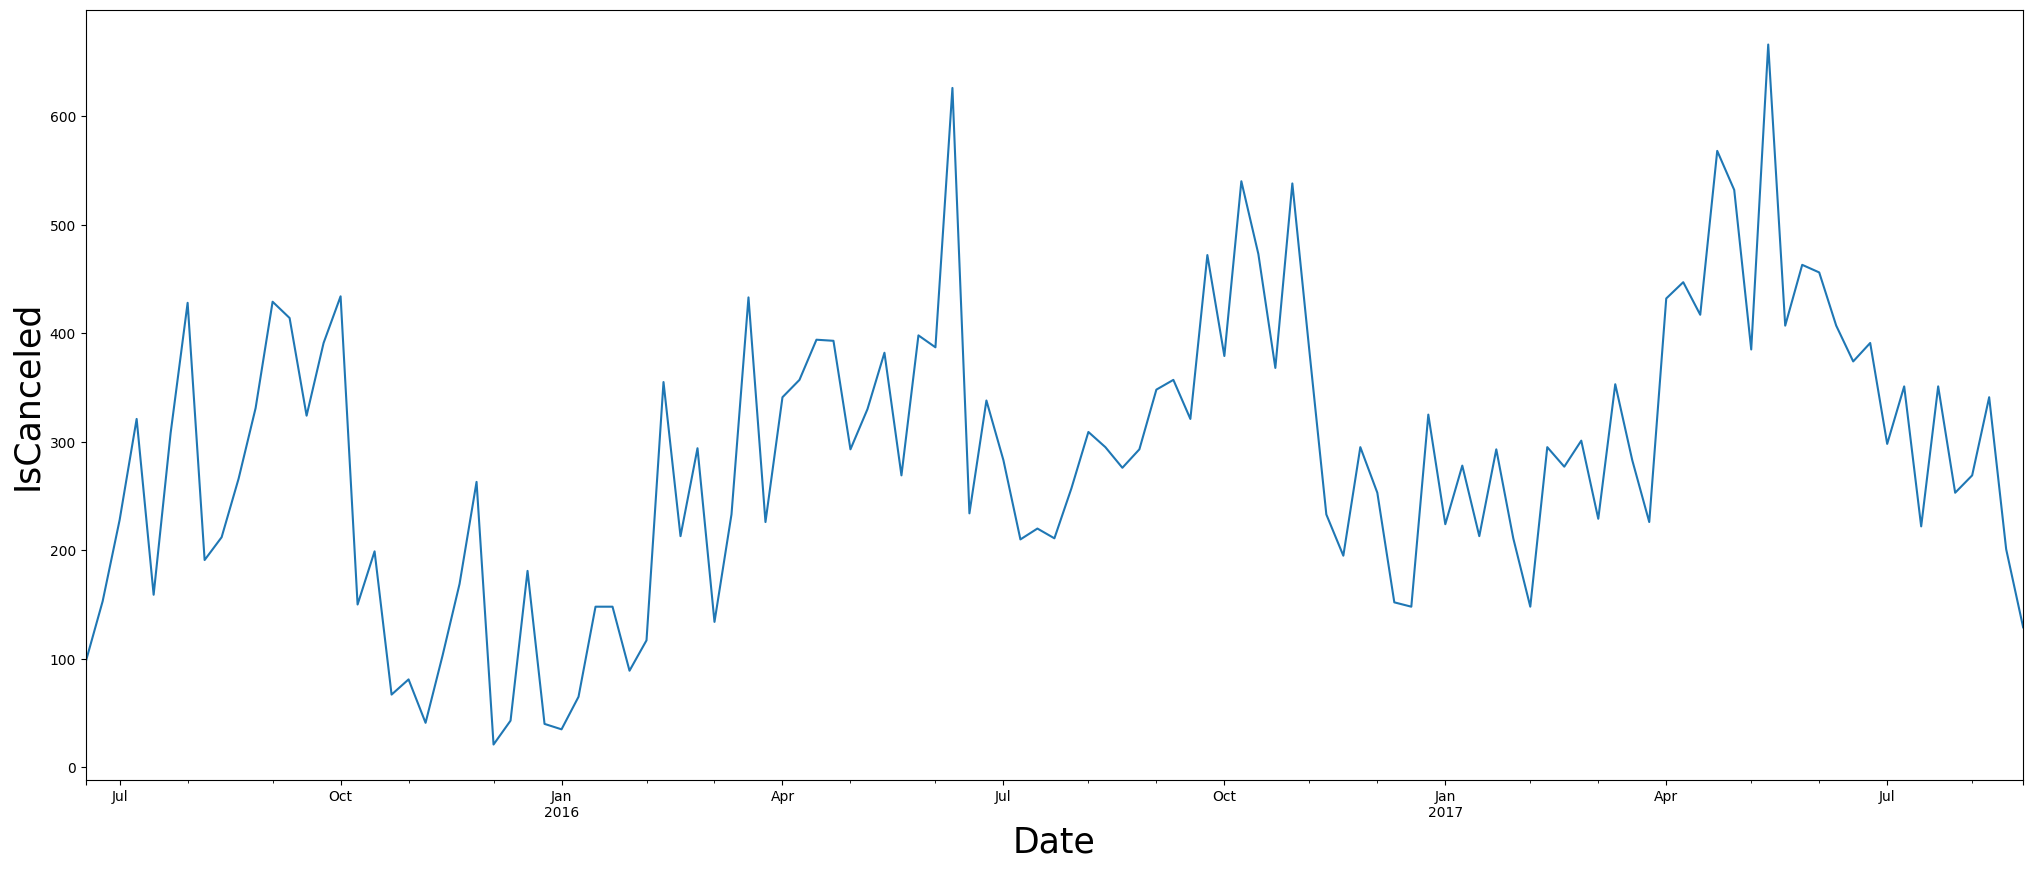

In [118]:
import matplotlib.pyplot as plt
df.IsCanceled.plot(figsize=(25,10))
plt.ylabel('IsCanceled',size=25)
plt.xlabel('Date',size=25)

In [119]:
from pydlm import dlm, trend, seasonality,modelTuner
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal52 = seasonality(period=52, discount=0.95, name='seasonal52', w=10)
# # Build a simple dlm
simple_dlm = dlm(df_train.IsCanceled) + linear_trend + seasonal52

In [120]:
myTuner = modelTuner(method='gradient_descent', loss='mse')
tunedDLM = myTuner.tune(simple_dlm, maxit=100)

Initializing models...
Initialization finished.
The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


In [121]:
print(dir(simple_dlm))

['Filter', '_1DmatrixToArray', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_autoNoise', '_backwardSmoother', '_checkAndGetWorkingDates', '_checkComponent', '_checkFeatureSize', '_checkPlotOptions', '_constructEvaluationForPrediction', '_continuePredict', '_copy', '_defaultOptions', '_fetchComponent', '_forwardFilter', '_getComponentMean', '_getComponentVar', '_getDiscounts', '_getLatentCov', '_getLatentState', '_getMSE', '_initialize', '_initializeFromBuilder', '_oneDayAheadPredict', '_predictInSample', '_predictModel', '_printInfo', '_printSystemInfo', '_resetModelStatus', '_result', '_reverseCopy', '_setDiscounts', '_setModelStatus', 'add', 'alter', 'append', '

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


/home/kartheekraj/.pyenv/versions/3.7.13/envs/bdlm-3.7.13/lib/python3.7/site-packages/pydlm/plot/dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


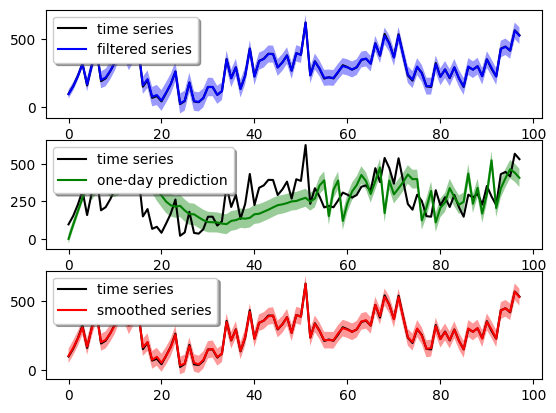

In [122]:
# # Fit the model
simple_dlm.fit()
# # Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [123]:
print(np.sqrt(simple_dlm.getMSE()))

138.08606728814115


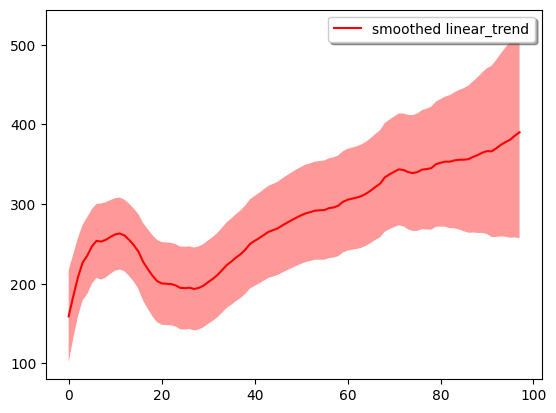

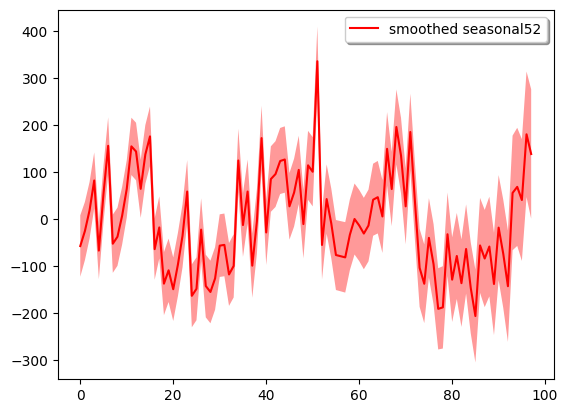

In [124]:
# Plot each component (attribute the time series to each component)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')

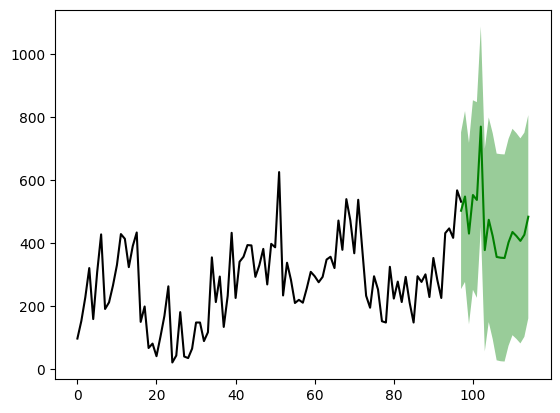

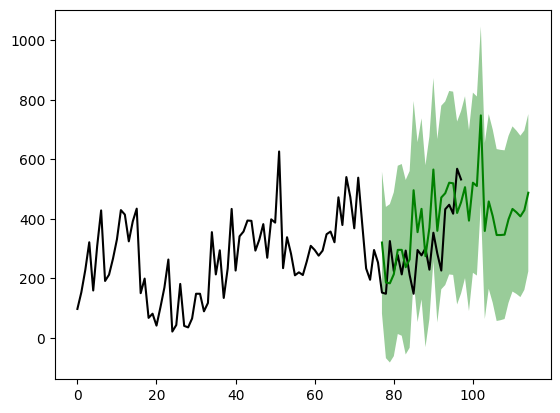

In [125]:
simple_dlm.setConfidence(p = 0.95)
# Plot the prediction give the first 351 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(date=97, N=18)
simple_dlm.plotPredictN(date=77, N=38)

In [126]:
df_train.dtypes

IsCanceled    int64
weekday       int64
month         int64
year          int64
dtype: object

In [127]:
len(df_test.IsCanceled)

18

In [128]:
simple_dlm.predictN(date=97, N=18)
type(simple_dlm.predictN(date=97, N=18))
pred=simple_dlm.predictN(date=97, N=18)
pred[0]

[503.24638436830435,
 548.3786098483156,
 430.5426219162509,
 553.1196802754882,
 537.4148851435984,
 770.5179333440486,
 378.17506360157,
 474.45057695645824,
 422.53307608711043,
 356.32759293464215,
 353.9480708351663,
 352.97123025161807,
 402.5722273448742,
 435.6383351723166,
 422.77794502870665,
 407.40903428640854,
 426.77903460218624,
 484.1761125218236]

In [129]:
from sklearn.metrics import mean_squared_error
# df_test.IsCanceled[0:18]
mse = mean_squared_error(df_test.IsCanceled[0:18], pred[0])
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 163.715521


# Dynamic Component 

In [130]:
from pydlm import dynamic, autoReg, longSeason

In [133]:
dynamic_feature = [[1.0, 2.0] for i in range(len(df_train.IsCanceled))]
regressor = dynamic(features=dynamic_feature ,discount=0.9, name='dynamic', w=1)
autoreg = autoReg(degree=2, discount=1, name='automatic', w=1)
dlm_model = dlm(df_train["IsCanceled"]) + linear_trend + seasonal52  + autoreg #+ regressor
dlm_model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [135]:
dlm_model.fitForwardFilter()
dlm_model.fitBackwardSmoother()

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


/home/kartheekraj/.pyenv/versions/3.7.13/envs/bdlm-3.7.13/lib/python3.7/site-packages/pydlm/plot/dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


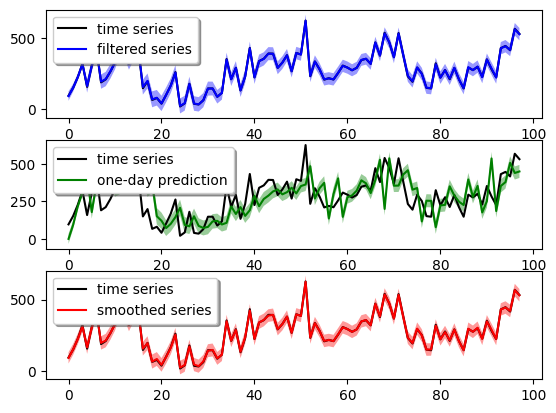

In [137]:
dlm_model.turnOff('data points')
dlm_model.plot()

In [170]:
print(np.sqrt(dlm_model.getMSE()))

124.15271915884291


In [139]:
dlm_predict = dlm_model.predictN(date=97, N=18)

In [ ]:
predict_series=pd.Series(dlm_predict[0],index=df_test.index,name=" simple model predictions")

In [142]:
from sklearn.metrics import mean_squared_error
# df_test.IsCanceled[0:18]
mse = mean_squared_error(df_test.IsCanceled[0:18], dlm_predict[0])
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 159.194350


<AxesSubplot:xlabel='Date'>

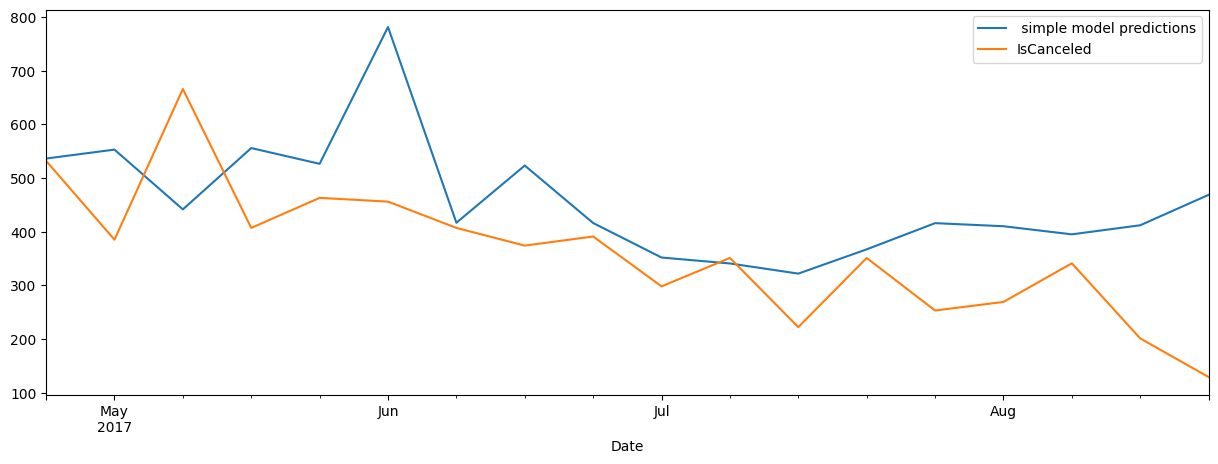

In [169]:
predict_series.plot(figsize=(15,5),legend=True)
df_test.IsCanceled[0:18].plot(legend=True)